In [53]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# Growth Accounting

Cobb-Douglas Production Function (Hicks Neutral)

In [72]:
# import data
url = 'https://raw.githubusercontent.com/thanhqtran/dataset/main/pwt/pwt10_raw.csv'
pwt_data = pd.read_csv(url)
# convert to dataframe
df = pd.DataFrame(pwt_data)
df_raw = df[df['countrycode'] == 'USA']
# we need capital stock, labor, output, and labsh (labor share)
df_raw = df_raw[['year', 'rgdpna', 'emp', 'rnna', 'labsh']]
dfna = df_raw.dropna()
dfna = dfna.reset_index(drop=True)
# extract every 10 years starting from 1954
n = 10
dfna_n = dfna.iloc[::n, :]
dfna_n = dfna_n.reset_index(drop=True)
dfna_n
# growth accounting
## take the log of the variables
dfna_n['log_rgdpna'] = np.log(dfna_n['rgdpna'])
dfna_n['log_emp'] = np.log(dfna_n['emp'])
dfna_n['log_rnna'] = np.log(dfna_n['rnna'])
## calculate the aggregate growth rate of the variables
dfna_n['gr_rgdpna'] = (dfna_n['log_rgdpna'].diff())*100
dfna_n['gr_emp'] = (dfna_n['log_emp'].diff())*100
dfna_n['gr_rnna'] = (dfna_n['log_rnna'].diff())*100
## calculate the average growth rate of the variables 
dfna_n['avg_gr_rgdpna'] = dfna_n['gr_rgdpna']/n
dfna_n['avg_gr_emp'] = dfna_n['gr_emp']/n
dfna_n['avg_gr_rnna'] = dfna_n['gr_rnna']/n
## calculate the contribution of each variable to the growth rate of output
dfna_n['contribution_kna'] = dfna_n['avg_gr_rnna']*(1-dfna_n['labsh'])
dfna_n['contribution_emp'] = dfna_n['avg_gr_emp']*(dfna_n['labsh'])
dfna_n['contribution_tfp'] = dfna_n['avg_gr_rgdpna'] -dfna_n['contribution_kna'] - dfna_n['contribution_emp']
dfna_n
## calculate contribution weight 
dfna_n['weight_kna'] = dfna_n['contribution_kna']/dfna_n['avg_gr_rgdpna']
dfna_n['weight_emp'] = dfna_n['contribution_emp']/dfna_n['avg_gr_rgdpna']
dfna_n['weight_tfp'] = dfna_n['contribution_tfp']/dfna_n['avg_gr_rgdpna']
dfna_n


,year,rgdpna,emp,rnna,labsh,log_rgdpna,log_emp,log_rnna,gr_rgdpna,gr_emp,gr_rnna,avg_gr_rgdpna,avg_gr_emp,avg_gr_rnna,contribution_kna,contribution_emp,contribution_tfp,weight_kna,weight_emp,weight_tfp
0,1950,2466594.75,62.814365,10576814.0,0.628363,14.718349,4.140184,16.174175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1960,3510944.75,70.956940,14711919.0,0.636742,15.071396,4.262073,16.504169,35.304661,12.188941,32.999373,3.530466,1.218894,3.299937,2.101208,0.442773,0.986485,0.595164,0.125415,0.279421
2,1970,5332994.50,84.696892,21404618.0,0.648986,15.489423,4.439079,16.879117,41.802774,17.700569,37.494871,4.180277,1.770057,3.749487,2.433363,0.621316,1.125599,0.582106,0.148630,0.269264
3,1980,7280300.50,103.070931,28983300.0,0.624349,15.800683,4.635417,17.182230,31.125924,19.633849,30.311311,3.112592,1.963385,3.031131,1.892483,0.737548,0.482561,0.608009,0.236956,0.155035
4,1990,10087555.00,123.046020,38223836.0,0.615198,16.126813,4.812558,17.458970,32.613035,17.714104,27.673950,3.261303,1.771410,2.767395,1.702496,0.681642,0.877165,0.522029,0.209009,0.268962
5,2000,14143361.00,138.636108,49368264.0,0.637073,16.464756,4.931853,17.714818,33.794284,11.929414,25.584849,3.379428,1.192941,2.558485,1.629942,0.432950,1.316536,0.482313,0.128114,0.389574
6,2010,16801388.00,140.713806,61054676.0,0.588000,16.636972,4.946728,17.927280,17.221618,1.487551,21.246200,1.722162,0.148755,2.124620,1.249276,0.061287,0.411599,0.725411,0.035587,0.239001


# Solow Model

No population growth nor technological progress

Text(0, 0.5, 'Capital-labor ratio $k$')

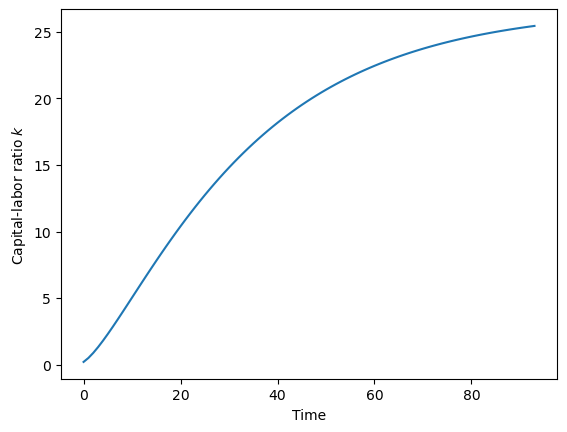

In [51]:
# parameters
alpha = 0.3
delta = 0.05
s = 0.5
g = 0.02

# initialize
K = 0.2
L = 1
A = 1
i = 0

# values
k_list = [ K/L ]
time = [ i ]

# time loop
diffk = K

while diffk > 0.05:
    i = i + 1
    time.append(i)
    Y = A * ( K ** (alpha)) * ( L ** (1 - alpha))
    K = s * Y + (1 - delta) * K
    k = K / (L)
    k_list.append(k)
    diffk = k - k_list[i-1]
    K = K

plt.plot(time, k_list)
plt.xlabel('Time')
plt.ylabel('Capital-labor ratio $k$')

# OLG Model

Endogenous Savings

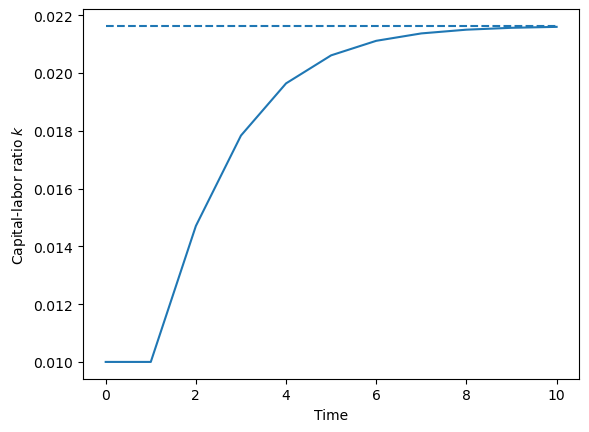

In [52]:
# parameters
alpha = 0.5
delta = 0.05
n = 0.2
beta = 0.98**30

# initialize
K = 0.01
L = 1
i = 0

# values
k_list = [ K/L ]
time = [ i ]
kstar = ( (beta/(1+beta)) * ((1-alpha)/(1+n)) )**(1/(1-alpha))
# time loop
loop = 10

for i in range(loop):
    i = i + 1
    time.append(i)
    # capital-labor ratio at t 
    k = K / L
    k_list.append(k)
    # calculate factor prices
    w = (1-alpha) * ( k ** alpha)
    r = alpha * ( k ** (alpha-1))
    # houshold choices
    c = w / (1+beta)
    s = (beta/(1+beta)) * w 
    # update capital and population
    K = s * L
    L = L * (1 + n)

plt.plot(time, k_list)
plt.xlabel('Time')
plt.ylabel('Capital-labor ratio $k$')
plt.hlines(kstar, 0, loop, linestyles='dashed')
